In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
data = pd.read_csv("C:/Users/Lenovo/Downloads/British airways/customer_booking.csv", encoding="ISO-8859-1")
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
data.shape

(50000, 14)

In [5]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
Internet = data.sales_channel.value_counts().values[0]  / data.sales_channel.count() *100
Mobile = data.sales_channel.value_counts().values[1]  / data.sales_channel.count() *100

print(f"Number of bookings through internet: {Internet} %")
print(f"Number of bookings through phone call: {Mobile} %")


Number of bookings through internet: 88.764 %
Number of bookings through phone call: 11.236 %


In [8]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [11]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [12]:
data['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [14]:
data = data.reset_index(drop=True)

df = data

In [15]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df = df.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df = df.join(encoder_df)

In [17]:
df.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)


In [18]:
label = df['booking_complete']


In [19]:
df = df.drop('booking_complete', axis=1)


In [20]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [22]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df)


In [23]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)


In [24]:
scaled_df['label']  = label


In [25]:
scaled_df


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


<AxesSubplot:>

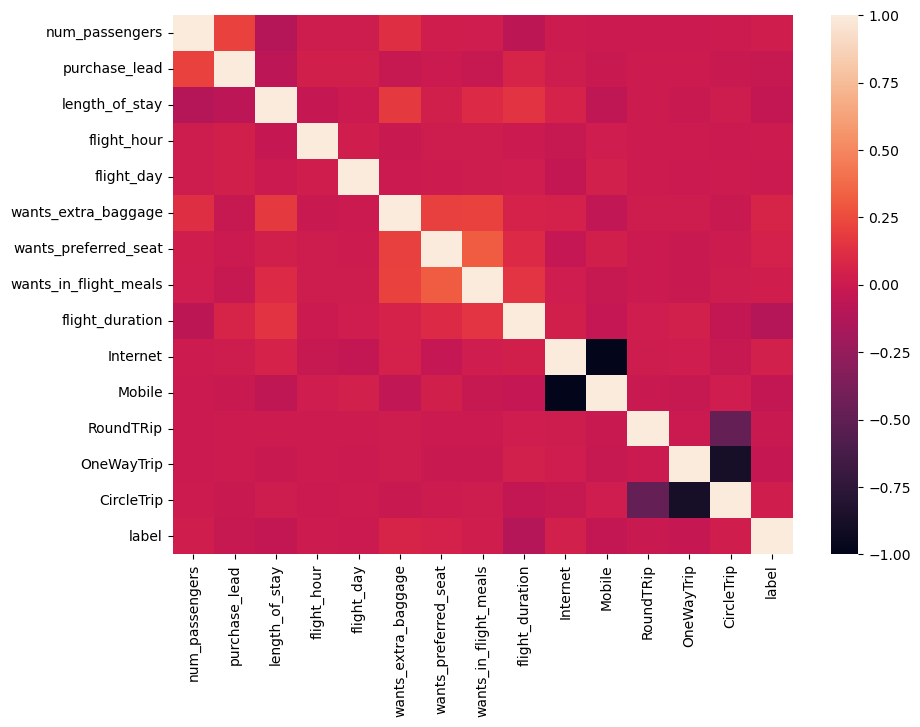

In [26]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [27]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [32]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)


In [34]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)


In [36]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.51 and 0.08 respectively


In [31]:

# Create the logistic regression model and train it on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

Accuracy: 0.852
